# Machine Learning Models to Assess Depression, Anxiety, and Stress (DASS-21)

## Dataset Loading and Exploratory Data Analysis


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")


Libraries imported successfully!


## 1. Load the Dataset


In [ ]:
# Load the dataset
df = pd.read_excel('DASS-21 dataset.xlsx')

print("Dataset loaded successfully!")
print(f"\nDataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\nOriginal column names:")
print(df.columns.tolist())


Dataset loaded successfully!

Dataset shape: (1258, 23)
Number of rows: 1258
Number of columns: 23


## 1.1. Rename Columns


In [ ]:
# Rename columns to convenient names
column_mapping = {
    'Your Gender': 'Gender',
    'Your Age': 'Age',
    'I found it hard to wind down': 'Hard_to_wind_down',
    ' I was aware of dryness of my mouth': 'Dry_mouth',
    ' I couldn't seem to experience any positive feeling at all': 'No_positive_feeling',
    'I experienced breathing difficulty (eg, excessively rapid breathing, breathlessness in the absence of physical exertion)': 'Breathing_difficulty',
    'I found it difficult to work up the initiative to do things': 'Lack_initiative',
    'I tended to over-react to situations': 'Over_react',
    'I experienced trembling (eg, in the hands)': 'Trembling',
    'I felt that I was using a lot of nervous energy': 'Nervous_energy',
    'I was worried about situations in which I might panic and make a fool of myself': 'Worried_panic',
    'I felt that I had nothing to look forward': 'Nothing_look_forward',
    'I found myself getting agitated': 'Getting_agitated',
    'I found it difficult to relax': 'Difficult_relax',
    'I felt down-hearted and blue': 'Downhearted',
    'I was intolerant of anything that kept me from getting on with what I was doing': 'Intolerant',
    'I felt I was close to panic': 'Close_panic',
    'I was unable to become enthusiastic about anything': 'Unable_enthusiastic',
    'I felt I wasn't worth much as a person': 'Not_worth_much',
    'I felt that I was rather touchy': 'Touchy',
    'I was aware of the action of my heart in the absence of physical exertion (eg, sense of heart rate increase, heart missing a beat)': 'Heart_awareness',
    'I felt scared without any good reason': 'Scared_no_reason',
    'I felt that life was meaningless': 'Life_meaningless'
}

# Rename columns
df.rename(columns=column_mapping, inplace=True)

print("Columns renamed successfully!")
print("\nNew column names:")
print(df.columns.tolist())
print(f"\nTotal columns: {len(df.columns)}")


## 2. Initial Data Exploration


In [5]:
# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

print("\n" + "="*80)
print("Last 5 rows of the dataset:")
print(df.tail())


First 5 rows of the dataset:
  Your Gender  Your Age  I found it hard to wind down   \
0        Male        24                              2   
1      Female        24                              0   
2        Male        25                              3   
3        Male        25                              2   
4        Male        23                              1   

    I was aware of dryness of my mouth  \
0                                    2   
1                                    2   
2                                    3   
3                                    3   
4                                    3   

    I couldn't seem to experience any positive feeling at all   \
0                                                  2             
1                                                  0             
2                                                  3             
3                                                  3             
4                                      

In [6]:
# Dataset information
print("Dataset Information:")
print("="*80)
df.info()

print("\n" + "="*80)
print("Column Names:")
print(df.columns.tolist())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 23 columns):
 #   Column                                                                                                                               Non-Null Count  Dtype 
---  ------                                                                                                                               --------------  ----- 
 0   Your Gender                                                                                                                          1258 non-null   object
 1   Your Age                                                                                                                             1258 non-null   int64 
 2   I found it hard to wind down                                                                                                         1258 non-null   int64 
 3    I was aware of dryness of my mouth                           

In [7]:
# Check for missing values
print("Missing Values Analysis:")
print("="*80)
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df)
else:
    print("No missing values found in the dataset!")

print(f"\nTotal missing values: {df.isnull().sum().sum()}")


Missing Values Analysis:
No missing values found in the dataset!

Total missing values: 0


In [8]:
# Statistical summary for numerical columns
print("Statistical Summary:")
print("="*80)
print(df.describe())


Statistical Summary:
          Your Age  I found it hard to wind down   \
count  1258.000000                    1258.000000   
mean     22.988076                       0.981717   
std       1.804004                       0.917686   
min      18.000000                       0.000000   
25%      22.000000                       0.000000   
50%      23.000000                       1.000000   
75%      24.000000                       2.000000   
max      29.000000                       3.000000   

        I was aware of dryness of my mouth  \
count                          1258.000000   
mean                              1.304452   
std                               1.046415   
min                               0.000000   
25%                               0.000000   
50%                               1.000000   
75%                               2.000000   
max                               3.000000   

        I couldn't seem to experience any positive feeling at all   \
count           

In [9]:
# Check data types
print("Data Types:")
print("="*80)
print(df.dtypes)

print("\n" + "="*80)
print("Numerical Columns:")
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(numerical_cols)

print("\n" + "="*80)
print("Categorical Columns:")
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_cols)


Data Types:
Your Gender                                                                                                                            object
Your Age                                                                                                                                int64
I found it hard to wind down                                                                                                            int64
 I was aware of dryness of my mouth                                                                                                     int64
 I couldn't seem to experience any positive feeling at all                                                                              int64
I experienced breathing difficulty (eg, excessively rapid breathing, breathlessness in the absence of physical exertion)                int64
I found it difficult to work up the initiative to do things                                                                             

## 3. Univariate Analysis


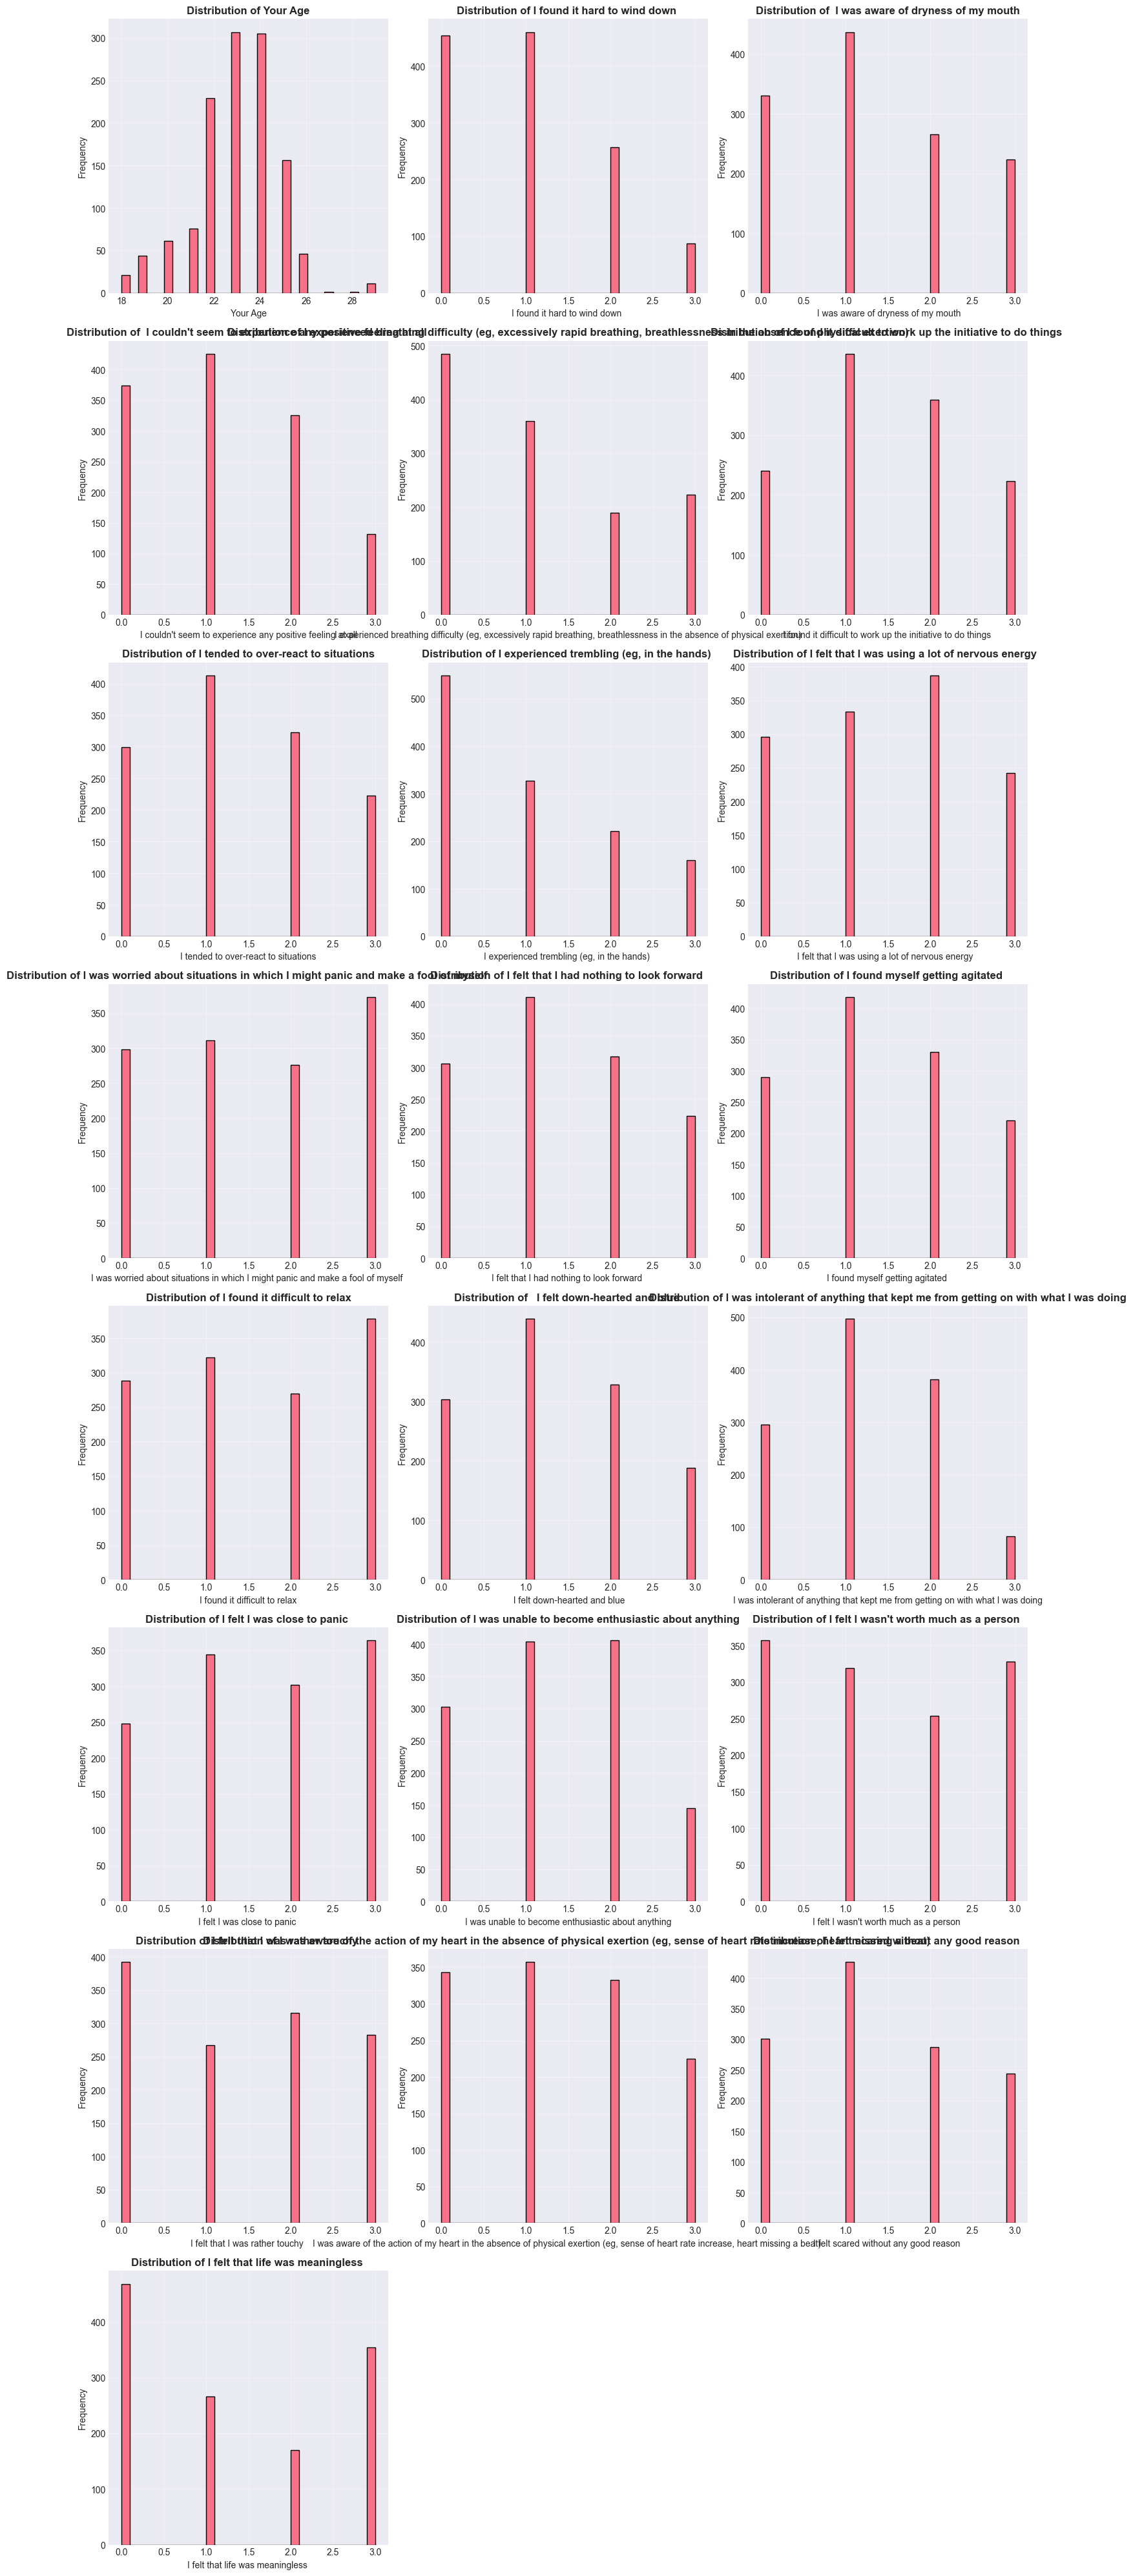

In [ ]:
# Distribution of numerical variables - Print each diagram separately
if len(numerical_cols) > 0:
    for col in numerical_cols:
        plt.figure(figsize=(10, 6))
        df[col].hist(bins=30, edgecolor='black')
        plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        print()  # Add spacing between plots
else:
    print("No numerical columns found for distribution plots.")


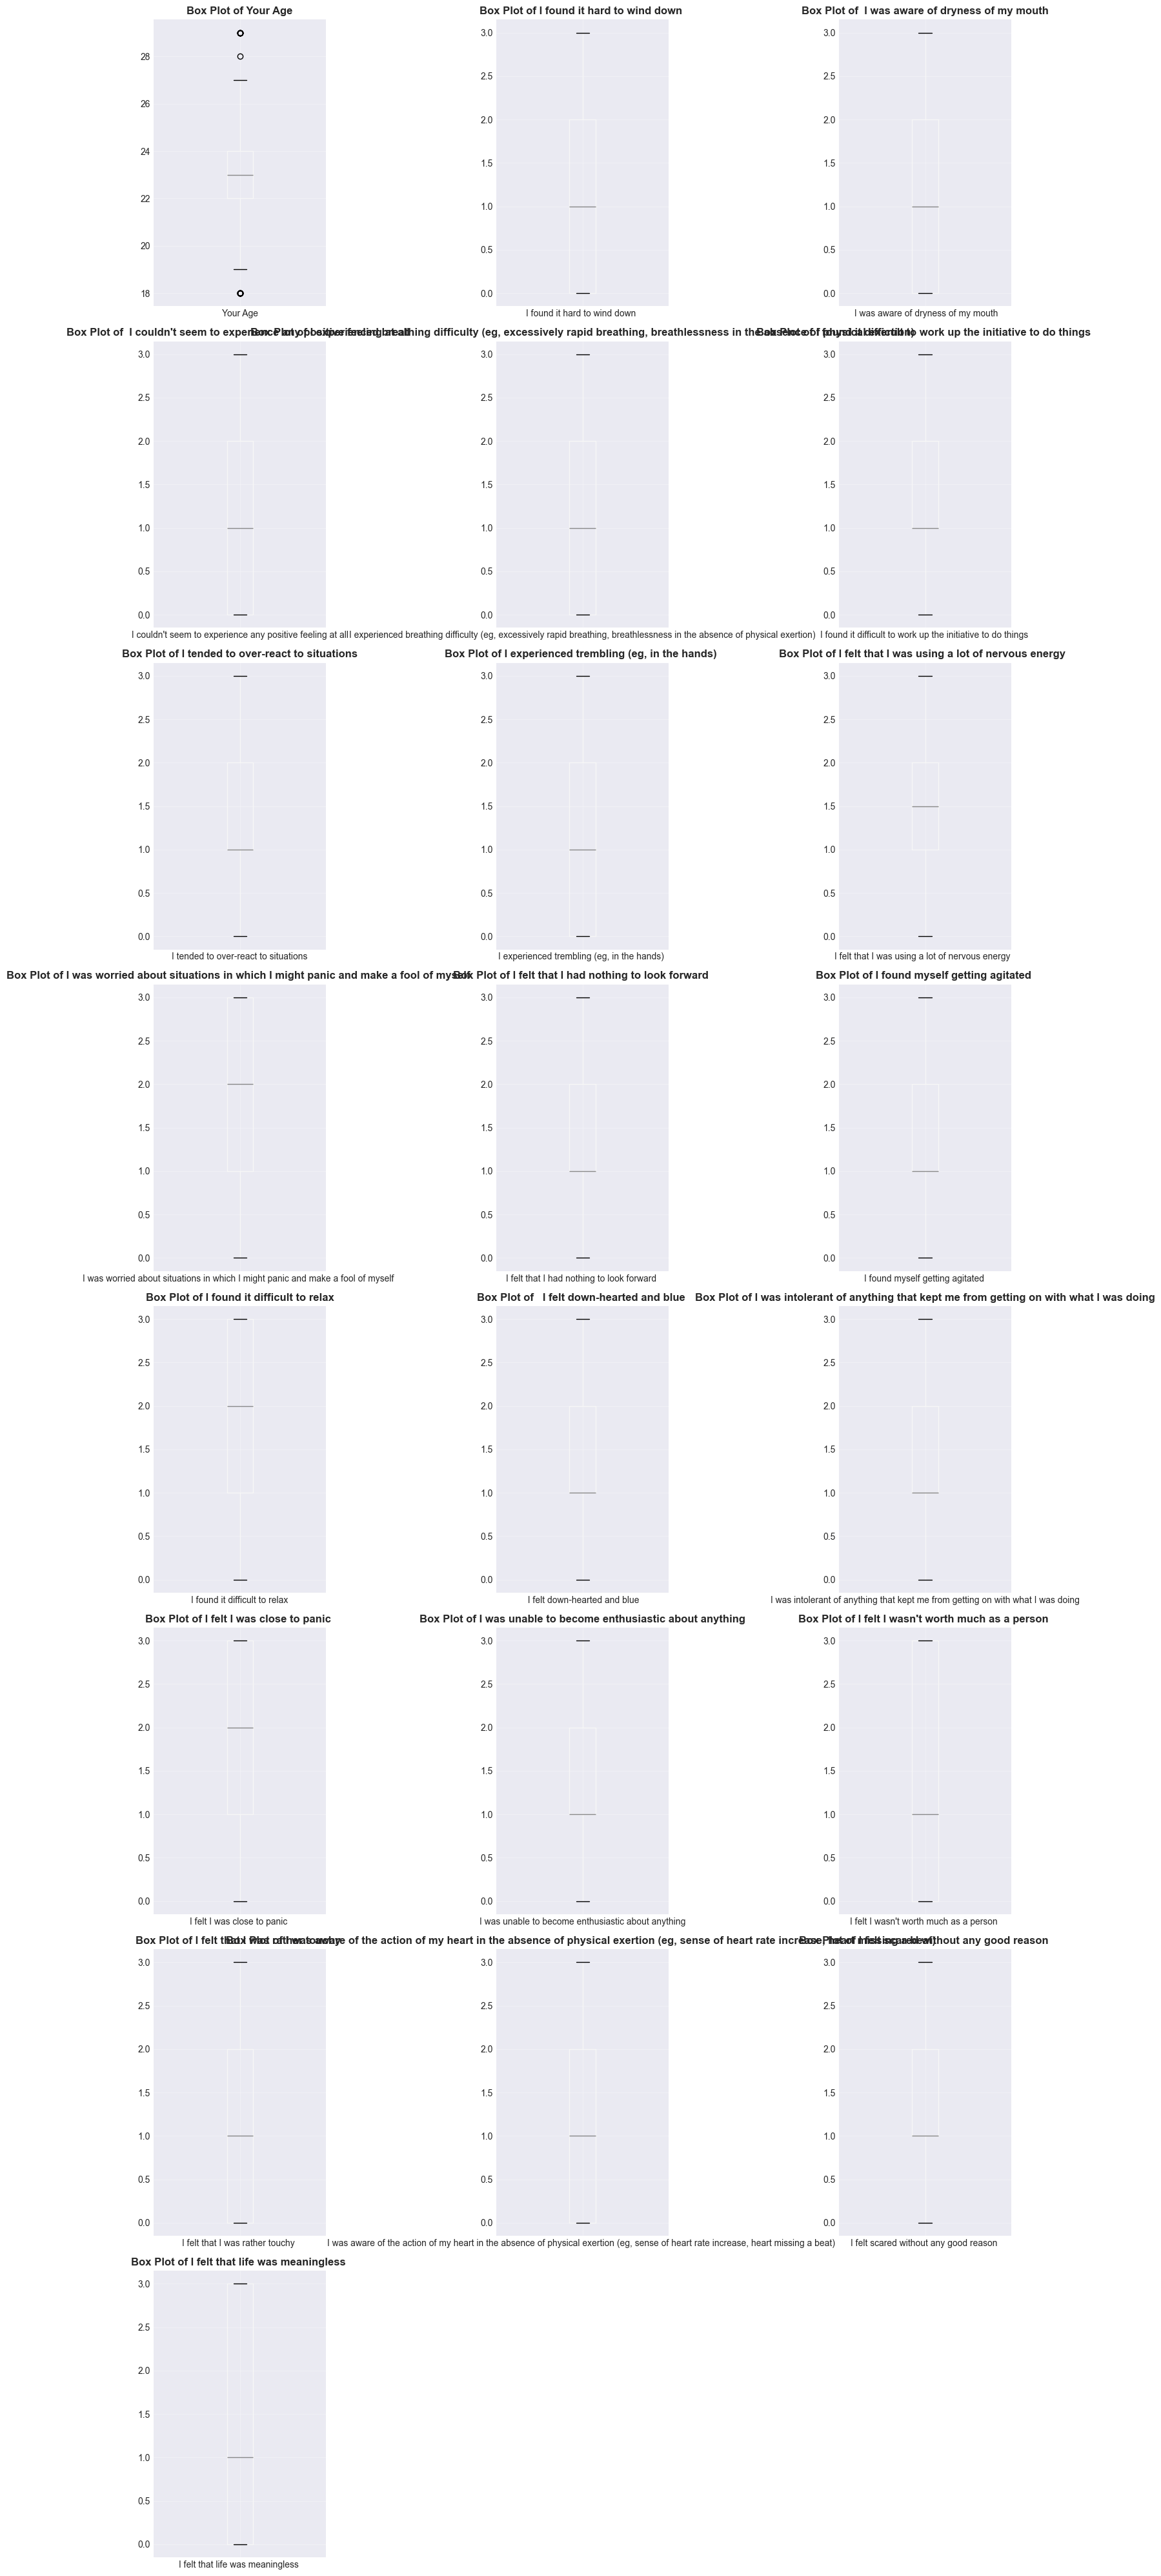

In [ ]:
# Box plots for numerical variables to detect outliers - Print each diagram separately
if len(numerical_cols) > 0:
    for col in numerical_cols:
        plt.figure(figsize=(8, 6))
        df.boxplot(column=col)
        plt.title(f'Box Plot of {col}', fontsize=14, fontweight='bold')
        plt.ylabel(col, fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        print()  # Add spacing between plots
else:
    print("No numerical columns found for box plots.")


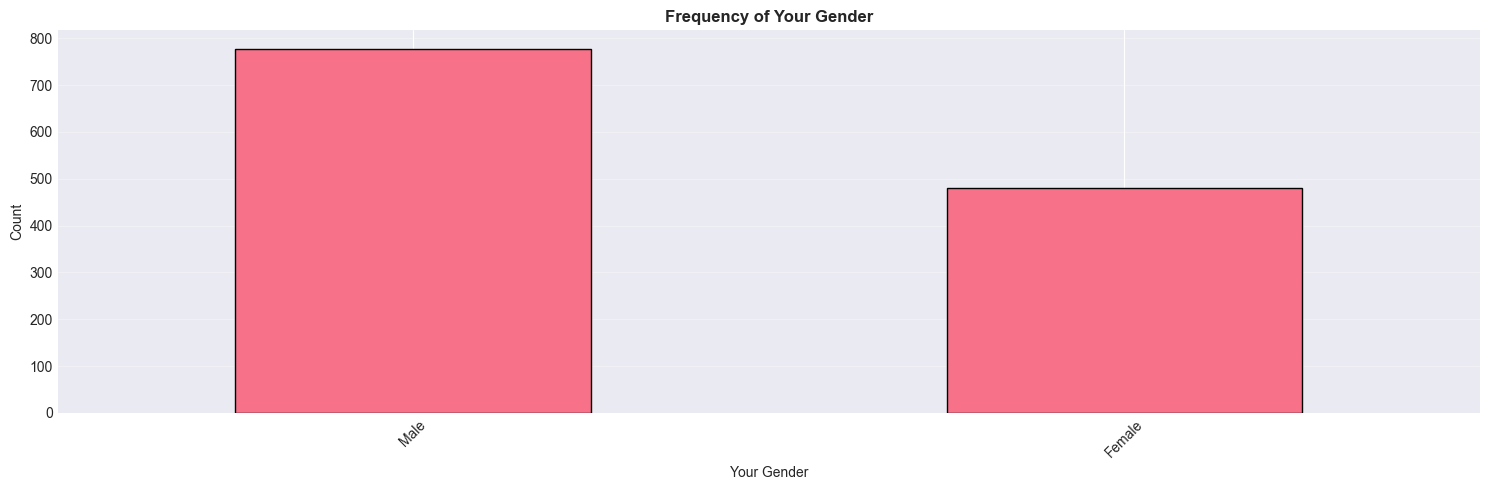


Value Counts for Categorical Variables:

Your Gender:
Your Gender
Male      778
Female    480
Name: count, dtype: int64
Unique values: 2


In [ ]:
# Categorical variable analysis - Print each diagram separately
if len(categorical_cols) > 0:
    for col in categorical_cols:
        plt.figure(figsize=(10, 6))
        value_counts = df[col].value_counts()
        value_counts.plot(kind='bar', edgecolor='black')
        plt.title(f'Frequency of {col}', fontsize=14, fontweight='bold')
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.grid(True, alpha=0.3, axis='y')
        plt.tight_layout()
        plt.show()
        print()  # Add spacing between plots
    
    # Print value counts for categorical variables
    print("\nValue Counts for Categorical Variables:")
    print("="*80)
    for col in categorical_cols:
        print(f"\n{col}:")
        print(df[col].value_counts())
        print(f"Unique values: {df[col].nunique()}")
else:
    print("No categorical columns found.")


## 4. Bivariate Analysis


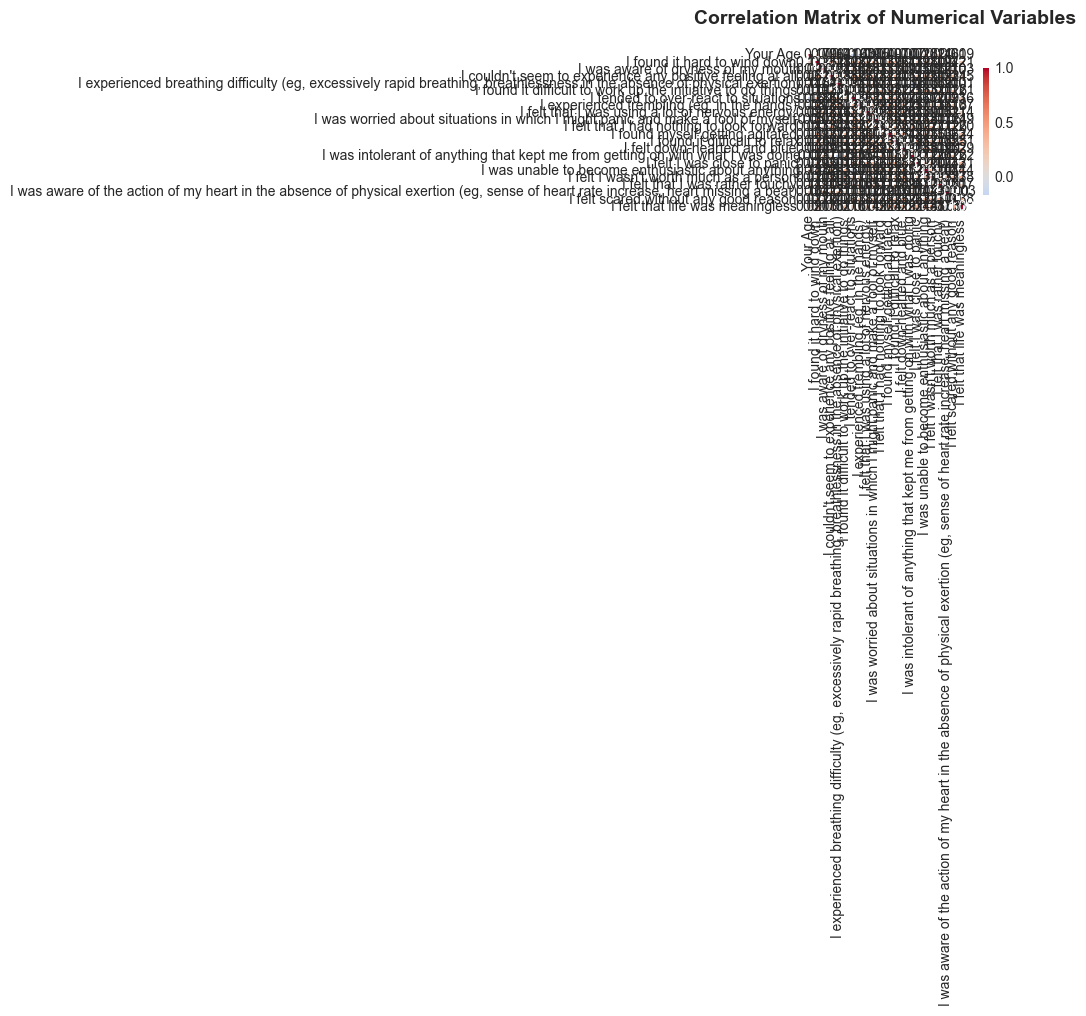


Correlation Matrix:
                                                    Your Age  \
Your Age                                            1.000000   
I found it hard to wind down                        0.165656   
 I was aware of dryness of my mouth                 0.090003   
 I couldn't seem to experience any positive fee...  0.060518   
I experienced breathing difficulty (eg, excessi...  0.140157   
I found it difficult to work up the initiative ...  0.007439   
I tended to over-react to situations               -0.162996   
I experienced trembling (eg, in the hands)         -0.033750   
I felt that I was using a lot of nervous energy     0.085545   
I was worried about situations in which I might... -0.046339   
I felt that I had nothing to look forward           0.040603   
I found myself getting agitated                     0.003328   
I found it difficult to relax                       0.070252   
  I felt down-hearted and blue                      0.002993   
I was intolerant of

In [13]:
# Correlation matrix for numerical variables
if len(numerical_cols) > 1:
    plt.figure(figsize=(12, 10))
    correlation_matrix = df[numerical_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix of Numerical Variables', fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    
    # Print correlation values
    print("\nCorrelation Matrix:")
    print("="*80)
    print(correlation_matrix)
elif len(numerical_cols) == 1:
    print("Only one numerical column found. Cannot create correlation matrix.")
else:
    print("No numerical columns found for correlation analysis.")


No DASS-related columns identified. Showing scatter plots for first few numerical columns.


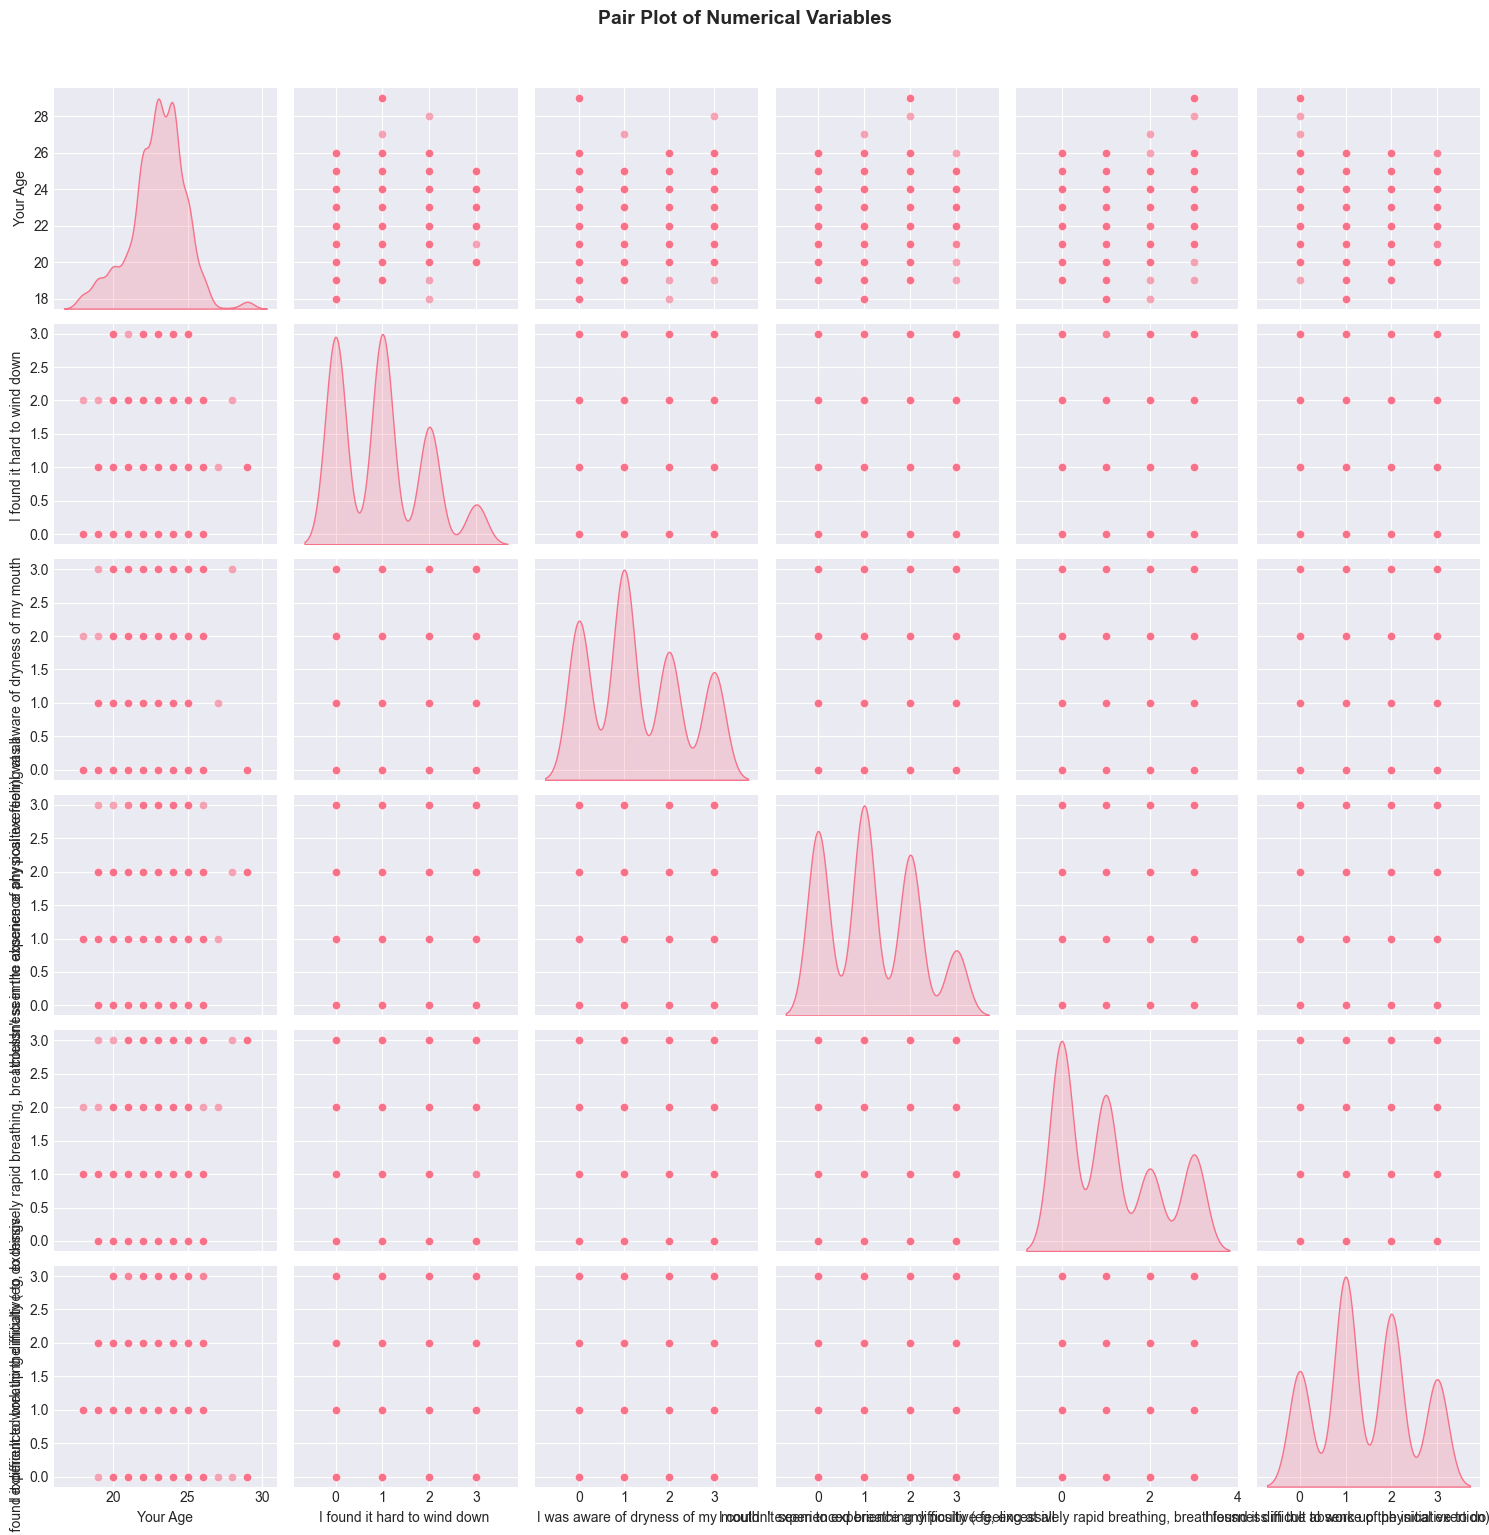

In [14]:
# Scatter plots for key numerical variables (if applicable)
# Focus on DASS-21 related columns (Depression, Anxiety, Stress)
dass_keywords = ['depression', 'anxiety', 'stress', 'dass', 'DASS']
dass_cols = [col for col in numerical_cols if any(keyword.lower() in col.lower() for keyword in dass_keywords)]

if len(dass_cols) >= 2:
    # Create scatter plot matrix for DASS variables
    if len(dass_cols) <= 6:  # Limit to 6 variables for readability
        sns.pairplot(df[dass_cols], diag_kind='kde', plot_kws={'alpha': 0.6})
        plt.suptitle('Pair Plot of DASS-21 Related Variables', y=1.02, fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()
    else:
        # If too many, show first 6
        sns.pairplot(df[dass_cols[:6]], diag_kind='kde', plot_kws={'alpha': 0.6})
        plt.suptitle('Pair Plot of DASS-21 Related Variables (First 6)', y=1.02, fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()
elif len(dass_cols) > 0:
    print(f"Found {len(dass_cols)} DASS-related column(s). Need at least 2 for pair plot.")
else:
    print("No DASS-related columns identified. Showing scatter plots for first few numerical columns.")
    if len(numerical_cols) >= 2:
        sns.pairplot(df[numerical_cols[:min(6, len(numerical_cols))]], diag_kind='kde', plot_kws={'alpha': 0.6})
        plt.suptitle('Pair Plot of Numerical Variables', y=1.02, fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()


## 5. Advanced Analysis


In [15]:
# Check for duplicates
print("Duplicate Analysis:")
print("="*80)
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
if duplicate_count > 0:
    print(f"Percentage of duplicates: {(duplicate_count/len(df))*100:.2f}%")
    print("\nDuplicate rows:")
    print(df[df.duplicated()])
else:
    print("No duplicate rows found.")


Duplicate Analysis:
Number of duplicate rows: 1003
Percentage of duplicates: 79.73%

Duplicate rows:
     Your Gender  Your Age  I found it hard to wind down   \
132         Male        26                              0   
166         Male        22                              1   
245       Female        22                              0   
258         Male        24                              2   
259       Female        24                              0   
...          ...       ...                            ...   
1253        Male        25                              1   
1254        Male        23                              1   
1255        Male        24                              0   
1256      Female        23                              2   
1257      Female        24                              1   

       I was aware of dryness of my mouth  \
132                                     0   
166                                     0   
245                            

In [16]:
# Outlier detection using IQR method
print("\nOutlier Detection (IQR Method):")
print("="*80)
if len(numerical_cols) > 0:
    outlier_summary = []
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = len(outliers)
        outlier_percent = (outlier_count / len(df)) * 100
        outlier_summary.append({
            'Column': col,
            'Outliers': outlier_count,
            'Percentage': f'{outlier_percent:.2f}%',
            'Lower Bound': f'{lower_bound:.2f}',
            'Upper Bound': f'{upper_bound:.2f}'
        })
    
    outlier_df = pd.DataFrame(outlier_summary)
    print(outlier_df.to_string(index=False))
else:
    print("No numerical columns found for outlier detection.")



Outlier Detection (IQR Method):
                                                                                                                             Column  Outliers Percentage Lower Bound Upper Bound
                                                                                                                           Your Age        33      2.62%       19.00       27.00
                                                                                                      I found it hard to wind down          0      0.00%       -3.00        5.00
                                                                                                 I was aware of dryness of my mouth         0      0.00%       -3.00        5.00
                                                                         I couldn't seem to experience any positive feeling at all          0      0.00%       -3.00        5.00
           I experienced breathing difficulty (eg, excessively rapid breathing, br

In [17]:
# Skewness and Kurtosis analysis
print("\nSkewness and Kurtosis Analysis:")
print("="*80)
if len(numerical_cols) > 0:
    from scipy import stats
    skewness_kurtosis = []
    for col in numerical_cols:
        skew = df[col].skew()
        kurt = df[col].kurtosis()
        skewness_kurtosis.append({
            'Column': col,
            'Skewness': f'{skew:.3f}',
            'Kurtosis': f'{kurt:.3f}',
            'Skewness Interpretation': 'Right skewed' if skew > 0.5 else 'Left skewed' if skew < -0.5 else 'Approximately normal'
        })
    
    skew_kurt_df = pd.DataFrame(skewness_kurtosis)
    print(skew_kurt_df.to_string(index=False))
else:
    print("No numerical columns found for skewness/kurtosis analysis.")



Skewness and Kurtosis Analysis:
                                                                                                                             Column Skewness Kurtosis Skewness Interpretation
                                                                                                                           Your Age   -0.328    0.942    Approximately normal
                                                                                                      I found it hard to wind down     0.574   -0.593            Right skewed
                                                                                                 I was aware of dryness of my mouth    0.302   -1.090    Approximately normal
                                                                         I couldn't seem to experience any positive feeling at all     0.335   -0.929    Approximately normal
           I experienced breathing difficulty (eg, excessively rapid breathing, breathlessness in

## 6. DASS-21 Specific Analysis


In [ ]:
# Identify DASS-21 related columns
print("DASS-21 Related Columns:")
print("="*80)
dass_keywords = ['depression', 'anxiety', 'stress', 'dass', 'DASS', 'Depression', 'Anxiety', 'Stress']
dass_related_cols = [col for col in df.columns if any(keyword in col for keyword in dass_keywords)]

if len(dass_related_cols) > 0:
    print(f"Found {len(dass_related_cols)} DASS-21 related columns:")
    for col in dass_related_cols:
        print(f"  - {col}")
    
    # Summary statistics for DASS variables
    if len(dass_related_cols) > 0:
        print("\nSummary Statistics for DASS-21 Variables:")
        print("="*80)
        print(df[dass_related_cols].describe())
        
        # Visualize DASS variables - Print each diagram separately
        print("\nVisualizing DASS-21 Variables:")
        print("="*80)
        for col in dass_related_cols:
            plt.figure(figsize=(10, 6))
            df[col].hist(bins=20, edgecolor='black')
            plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')
            plt.xlabel('Score', fontsize=12)
            plt.ylabel('Frequency', fontsize=12)
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()
            print()  # Add spacing between plots
else:
    print("No DASS-21 related columns found with standard naming.")
    print("All columns in dataset:")
    for col in df.columns:
        print(f"  - {col}")


DASS-21 Related Columns:
No DASS-21 related columns found with standard naming.
All columns in dataset:
  - Your Gender
  - Your Age
  - I found it hard to wind down 
  -  I was aware of dryness of my mouth
  -  I couldn't seem to experience any positive feeling at all 
  - I experienced breathing difficulty (eg, excessively rapid breathing, breathlessness in the absence of physical exertion)
  - I found it difficult to work up the initiative to do things 
  - I tended to over-react to situations
  - I experienced trembling (eg, in the hands) 
  - I felt that I was using a lot of nervous energy  
  - I was worried about situations in which I might panic and make a fool of myself 
  - I felt that I had nothing to look forward 
  - I found myself getting agitated 
  - I found it difficult to relax
  -   I felt down-hearted and blue 
  - I was intolerant of anything that kept me from getting on with what I was doing
  - I felt I was close to panic 
  - I was unable to become enthusiastic 

In [19]:
# Display sample of the data
print("Sample Data Display:")
print("="*80)
print(df.head(10))


Sample Data Display:
  Your Gender  Your Age  I found it hard to wind down   \
0        Male        24                              2   
1      Female        24                              0   
2        Male        25                              3   
3        Male        25                              2   
4        Male        23                              1   
5      Female        21                              0   
6        Male        24                              2   
7        Male        24                              0   
8      Female        23                              3   
9        Male        23                              2   

    I was aware of dryness of my mouth  \
0                                    2   
1                                    2   
2                                    3   
3                                    3   
4                                    3   
5                                    0   
6                                    1   
7   

## 7. Summary and Insights


In [20]:
# Final summary
print("="*80)
print("EXPLORATORY DATA ANALYSIS SUMMARY")
print("="*80)
print(f"\n1. Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"2. Missing Values: {df.isnull().sum().sum()} total missing values")
print(f"3. Duplicate Rows: {df.duplicated().sum()}")
print(f"4. Numerical Columns: {len(numerical_cols)}")
print(f"5. Categorical Columns: {len(categorical_cols)}")
print(f"6. Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

if len(dass_related_cols) > 0:
    print(f"\n7. DASS-21 Related Columns Identified: {len(dass_related_cols)}")
    print("   Columns:", ', '.join(dass_related_cols[:5]), '...' if len(dass_related_cols) > 5 else '')

print("\n" + "="*80)
print("EDA Complete! Ready for model development.")
print("="*80)


EXPLORATORY DATA ANALYSIS SUMMARY

1. Dataset Shape: 1258 rows × 23 columns
2. Missing Values: 0 total missing values
3. Duplicate Rows: 1003
4. Numerical Columns: 22
5. Categorical Columns: 1
6. Memory Usage: 0.28 MB

EDA Complete! Ready for model development.
